# Task-1
## Predict the percentage of marks of an student based on the number of study hours. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (6, 4) 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('marks.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


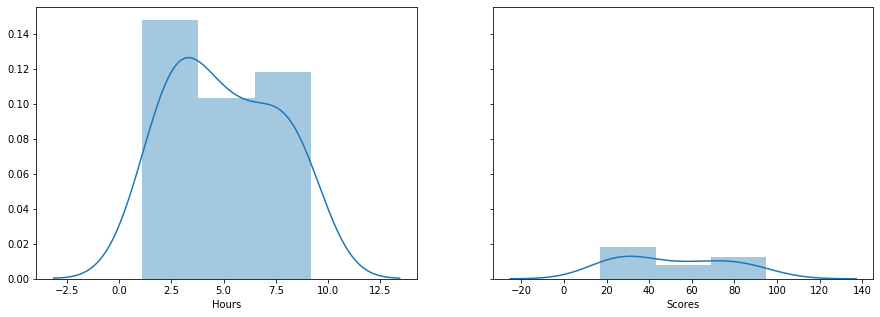

In [6]:
# Histogram

fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey='all')

sns.distplot(a=df['Hours'], ax=ax[0])
sns.distplot(a=df['Scores'], ax=ax[1])

In [7]:
# Check Skewness 

print(f"Hours Skewness: {df['Hours'].skew()}")
print(f"Scores Skewness: {df['Scores'].skew()}")

Hours Skewness: 0.1903382010052985
Scores Skewness: 0.2339646665397317


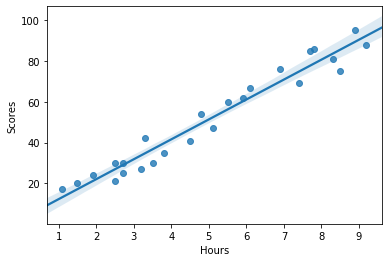

In [8]:
# Regression plot

sns.regplot(x='Hours', y='Scores', data=df)

In [9]:
# Dependent and Independent Variables

X = df['Hours'].values.reshape(-1, 1)
Y = df['Scores'].values.reshape(-1, 1)

In [10]:
# Train test split

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [11]:
# <--  Model Building -->

regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_predictions = regressor.predict(x_test)

In [12]:
# R Square

r2_score(y_true=y_test, y_pred=y_predictions)

0.9454906892105354

In [13]:
# K-Fold Cross Vaidation

score = cross_val_score(estimator=regressor, scoring='r2', X=x_train, y=y_train, cv=5)
print(f'Average R Square: {score.mean()}')
print(f'R Square (std): {score.std()}')

Average R Square: 0.931519532008859
R Square (std): 0.022415030387883297


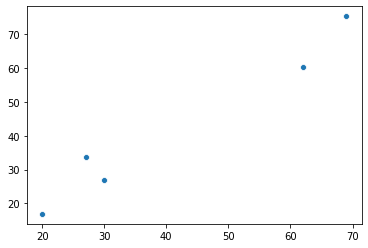

In [14]:
sns.scatterplot(x=y_test.reshape(1 ,-1)[0], y=y_predictions.reshape(1 ,-1)[0])

## Q: What will be predicted score if a student studies for 9.25 hrs/ day? 

In [15]:
regressor.predict([[9.25]])

array([[93.69173249]])

In [16]:
# Save Model

with open('Model.txt','wb') as f:
    pickle.dump(regressor, f)